In [5]:
import numpy as np
from matplotlib import pyplot as plt

1 solar masses = 1 internal units for mass 

1 solar radius = 1 internal units for radius

In [6]:
M = 10**2 #total mass in internal units
a = (M)**(3/7)

print(a)

N = 50 #number of particles
m = M/N #mass of each particle in internal units


7.196856730011519


## GENERATE r 
\begin{equation}
r(P)= a \cdot P^{1/3}
\end{equation}

In [7]:
def radius (P, a):
    return a*P**(1/3)

In [8]:
P_r =  np.random.uniform(0,1, N)
r = radius(P_r, a)

(array([0.02875188, 0.05750377, 0.20126319, 0.23001508, 0.20126319,
        0.25876696, 0.46003016]),
 array([2.31682304, 3.01242961, 3.70803618, 4.40364275, 5.09924933,
        5.7948559 , 6.49046247, 7.18606904]),
 <BarContainer object of 7 artists>)

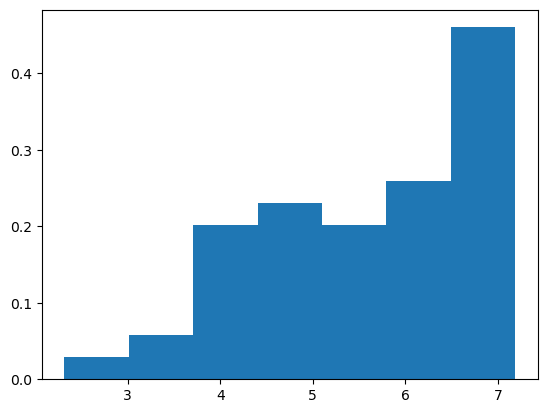

In [9]:
plt.hist(r, bins=int(N**0.5), density=True)

## GENERATE $\Phi$
\begin{equation}
\Phi = 2\pi P
\end{equation}

In [10]:
def phi (P):
    return 2*np.pi*P

In [11]:
P_p =  np.random.uniform(0,1, N)
p = phi(P_p)

(array([0.11481202, 0.11481202, 0.13777442, 0.25258643, 0.09184961,
        0.18369922, 0.25258643]),
 array([0.09563601, 0.96662499, 1.83761397, 2.70860295, 3.57959193,
        4.45058092, 5.3215699 , 6.19255888]),
 <BarContainer object of 7 artists>)

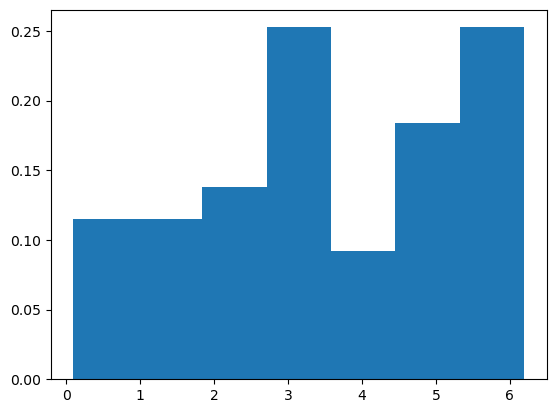

In [12]:
plt.hist(p, bins=int(N**0.5), density=True)

## GENERATE $\theta$
\begin{equation}
\theta = \arccos (1-2P)
\end{equation}

In [13]:
def theta (P):
    return np.arccos(1-2*P)

In [14]:
P_t =  np.random.uniform(0,1, N)
t = theta(P_t)

(array([0.36476442, 0.31265521, 0.36476442, 0.78163803, 0.15632761,
        0.15632761, 0.46898282]),
 array([0.13727482, 0.52108419, 0.90489355, 1.28870292, 1.67251229,
        2.05632166, 2.44013102, 2.82394039]),
 <BarContainer object of 7 artists>)

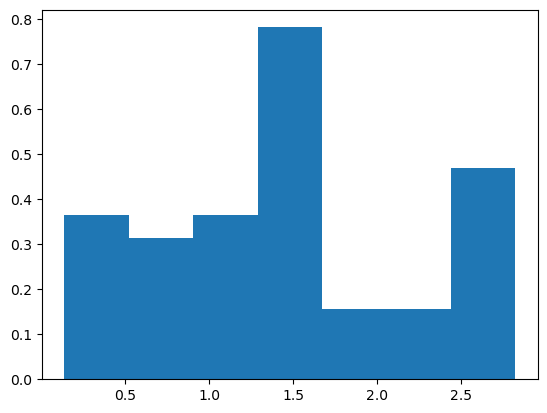

In [15]:
plt.hist(t, bins=int(N**0.5), density=True)

## From spherical to cartesian( \phi \).

In [16]:
def cart_x (r, t, p):
    return r * np.sin(t) * np.cos(p)

def cart_y (r, t, p):
    return r * np.sin(t) * np.sin(p)

def cart_z (r, t, p):
    return r * np.cos(t)

In [17]:
x=cart_x(r,t,p)
y=cart_y(r,t,p)
z=cart_z(r,t,p)

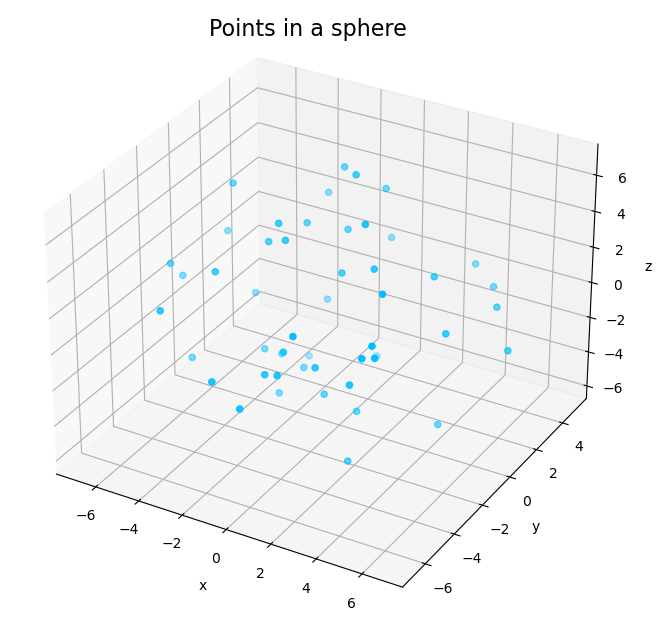

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

### Create the input file

In [19]:
masses = np.ones(N)*m

matrix = (np.array([masses, x, y, z, np.zeros(N), np.zeros(N), np.zeros(N)])).T

In [20]:
with open("input.txt", "w") as input:
    input.write(str(N) + "\n")  
    input.write("0\n")  
    for i in range(N):
        input.write(" ".join(map(str, matrix[i])) + "\n")

In [21]:
def collapse_t(m,a):
    return ((3*np.pi/32) * ((4/3*np.pi*a**3)/m))**(1/2) #already in internal units

In [22]:
t=collapse_t(M,a)
print(t)

2.144465999599124
